In [1]:
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [2]:
df = pd.read_csv('Resale_Price.csv')   

In [3]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [4]:
print(df.dtypes)
print(df.nunique())

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price             int64
dtype: object
month                   120
town                     26
flat_type                 7
block                  1094
street_name             417
storey_range              9
floor_area_sqm          199
flat_model               13
lease_commence_date      31
resale_price           3782
dtype: int64


In [5]:
df.shape
df.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [6]:
df.duplicated().sum()
df = df.drop_duplicates()

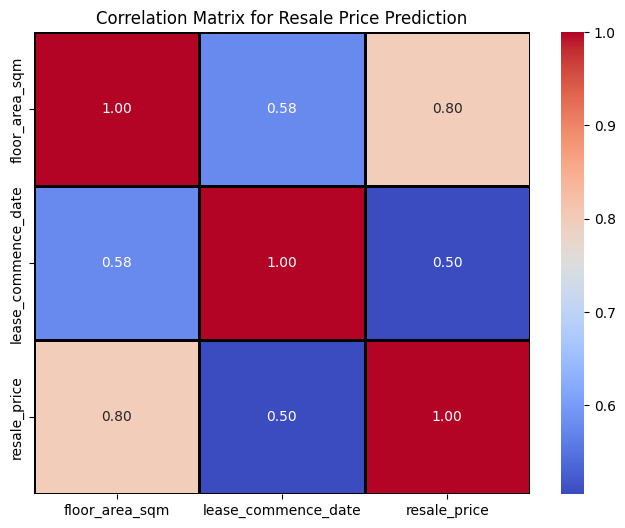

In [7]:
correlation_data = df[['floor_area_sqm', 'lease_commence_date', 'resale_price']]
corr_matrix = correlation_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Matrix for Resale Price Prediction')
plt.show()

This heatmap visualizes the correlation between the features and the resale price of flats. The feature floor_area_sqm has the highest correlation with resale_price (0.80), making it a critical predictor. Although lease_commence_date shows a weaker correlation (0.51), it remains valuable. This is because it provides insight into the lease duration and the flat's age, which can influence buyers' decisions and perceived value. Thus, both features contribute uniquely to predicting resale price and should be considered in the analysis.

In [8]:
del df ["block"]
del df ["street_name"]

The block and street_name columns were removed as they don’t significantly affect resale price predictions. The
block column lacks predictive value, while street_name is redundant because the town column already captures the location's influence on resale price.

In [9]:
df

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,04 TO 06,146.0,MAISONETTE,1988,440000


In [10]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,286370.000000,286370.000000,286370.000000
mean,93.393495,1983.213465,219717.945350
std,27.356740,6.082690,128139.900455
min,28.000000,1967.000000,5000.000000
25%,68.000000,1979.000000,127000.000000
50%,91.000000,1984.000000,195000.000000
75%,113.000000,1987.000000,298000.000000
max,307.000000,1997.000000,900000.000000


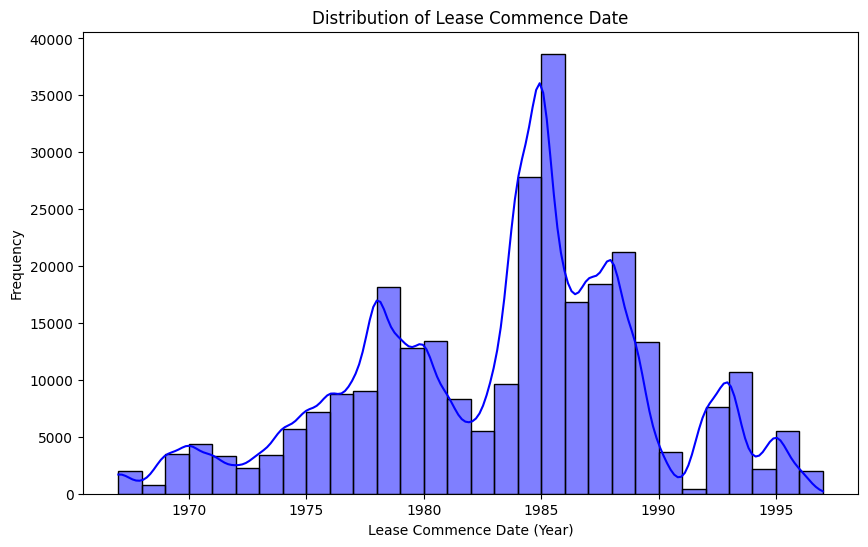

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lease_commence_date'], bins=30, kde=True, color='blue')
# Adding labels and title
plt.title('Distribution of Lease Commence Date')
plt.xlabel('Lease Commence Date (Year)')
plt.ylabel('Frequency')
plt.show()

The **lease commence date** is skewed, with most leases starting in the 1980s, and fewer in the later years. This can affect the model, especially for algorithms like linear regression, which may be biased toward the more frequent years. To fix this, combining the **month** and **lease commence date** into a new feature, **lease age**, simplifies the data. It focuses on the **age of the flat**, which is a key factor in predicting resale price, without being affected by the skewed distribution of the raw lease commence date.

In [12]:
# Convert 'month' to datetime
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

# Convert 'lease_commence_date' to datetime (assuming it's in 'YYYY' format)
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'], format='%Y')

# Calculate lease age as the difference in years and months
df['lease_age_years'] = (df['month'] - df['lease_commence_date']).dt.days // 365  # Convert days to years

df

C:\Users\farvi\AppData\Local\Temp\ipykernel_9532\3205803222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
C:\Users\farvi\AppData\Local\Temp\ipykernel_9532\3205803222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'], format='%Y')
C:\Users\farvi\AppData\Local\Temp\ipykernel_9532\3205803222.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_age_years
0,1990-01-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977-01-01,9000,13
1,1990-01-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977-01-01,6000,13
2,1990-01-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977-01-01,8000,13
3,1990-01-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977-01-01,6000,13
4,1990-01-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976-01-01,47200,14
...,...,...,...,...,...,...,...,...,...
287191,1999-12-01,YISHUN,EXECUTIVE,10 TO 12,142.0,APARTMENT,1987-01-01,456000,12
287192,1999-12-01,YISHUN,EXECUTIVE,01 TO 03,142.0,APARTMENT,1988-01-01,408000,11
287193,1999-12-01,YISHUN,EXECUTIVE,07 TO 09,146.0,MAISONETTE,1988-01-01,469000,11
287194,1999-12-01,YISHUN,EXECUTIVE,04 TO 06,146.0,MAISONETTE,1988-01-01,440000,11


Now that we have lease age, we can delete the columns, "lease_commence_date" and "month" in order to keep the dataset clean and reduce redundancy.

In [13]:
del df ["lease_commence_date"]
del df ["month"]
df

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,lease_age_years
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,9000,13
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,6000,13
2,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,8000,13
3,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,6000,13
4,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,47200,14
...,...,...,...,...,...,...,...
287191,YISHUN,EXECUTIVE,10 TO 12,142.0,APARTMENT,456000,12
287192,YISHUN,EXECUTIVE,01 TO 03,142.0,APARTMENT,408000,11
287193,YISHUN,EXECUTIVE,07 TO 09,146.0,MAISONETTE,469000,11
287194,YISHUN,EXECUTIVE,04 TO 06,146.0,MAISONETTE,440000,11


C:\Users\farvi\AppData\Local\Temp\ipykernel_9532\3217548063.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=storey_counts.index, y=storey_counts.values, palette='viridis')


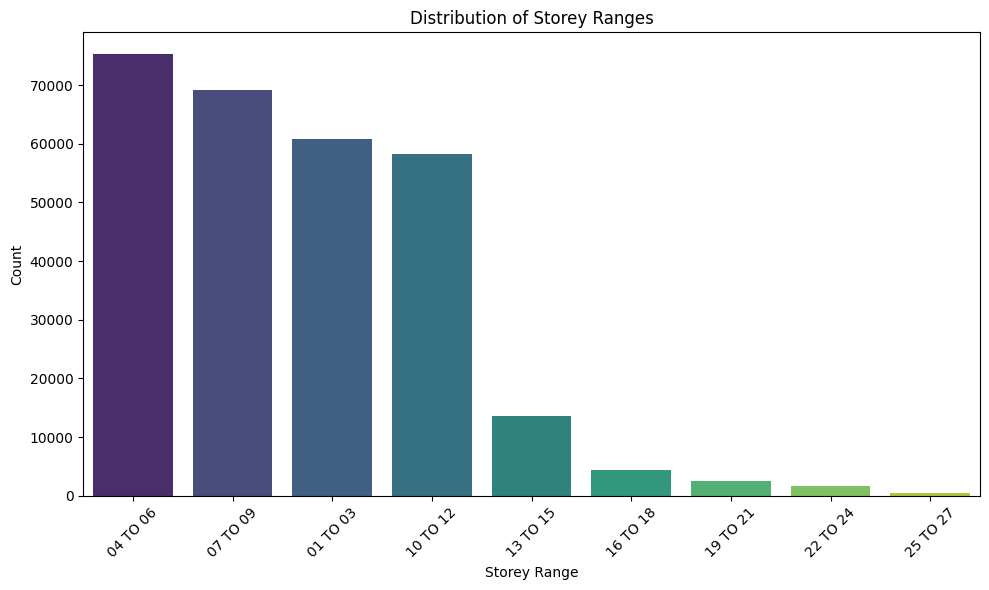

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each storey range
storey_counts = df['storey_range'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=storey_counts.index, y=storey_counts.values, palette='viridis')
plt.title('Distribution of Storey Ranges')
plt.xlabel('Storey Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The storey_range values, as shown, are categorical and cannot be directly used to train a model. These ranges need to be modified, such as converting them to numerical representations such as using one-hot encoding, to ensure the model can interpret them effectively during training.

In [15]:
# Step 1: Extract the highest floor from the 'storey_range' column
df['highest_floor'] = df['storey_range'].str.split(' TO ').str[1].astype(int)

# Step 2: Calculate statistics for the highest floor
highest_floor_stats = df['highest_floor'].describe()
print(highest_floor_stats)

# Step 3: Define thresholds for low, mid, and high storey categories based on percentiles
low_threshold = highest_floor_stats['25%']  # 25th percentile
high_threshold = highest_floor_stats['75%']  # 75th percentile

# Step 4: Categorize the storey range into Low, Mid, and High based on the thresholds
df['storey_category'] = pd.cut(df['highest_floor'], 
                                bins=[0, low_threshold, high_threshold, float('inf')], 
                                labels=['Low Storey', 'Mid Storey', 'High Storey'], 
                                right=False)

count    286370.000000
mean          8.203859
std           4.173455
min           3.000000
25%           6.000000
50%           9.000000
75%          12.000000
max          27.000000
Name: highest_floor, dtype: float64


C:\Users\farvi\AppData\Local\Temp\ipykernel_9532\1617640993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['highest_floor'] = df['storey_range'].str.split(' TO ').str[1].astype(int)
C:\Users\farvi\AppData\Local\Temp\ipykernel_9532\1617640993.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['storey_category'] = pd.cut(df['highest_floor'],


The dataset was modified by extracting the highest floor from the storey_range column. Percentiles (25th and 75th) were calculated to define thresholds for categorizing the data into Low Storey, Mid Storey, and High Storey. This approach simplifies the raw range data into structured, meaningful categories suitable for model training.

C:\Users\farvi\AppData\Local\Temp\ipykernel_9532\4144188141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='storey_category', data=df, palette='viridis')


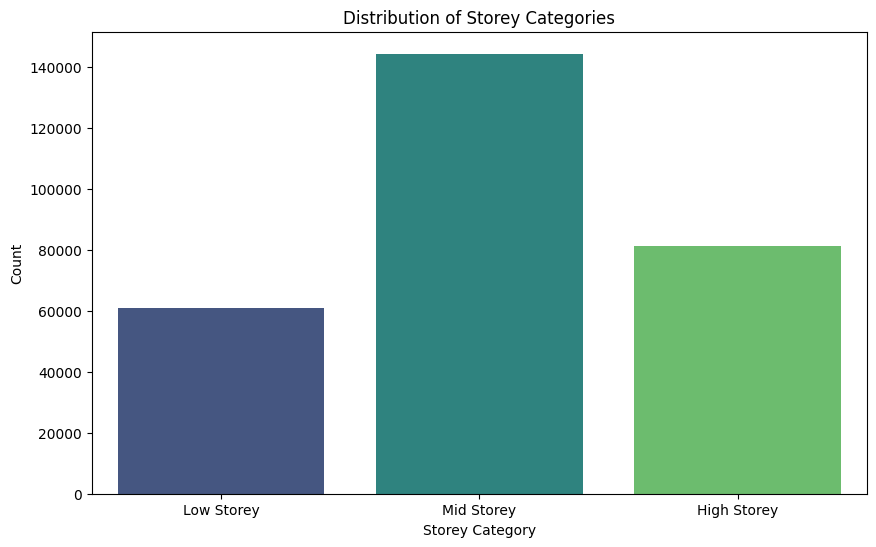

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='storey_category', data=df, palette='viridis')

# Adding labels and title
plt.title('Distribution of Storey Categories')
plt.xlabel('Storey Category')
plt.ylabel('Count')

# Show the plot
plt.show()

The bar plot highlights the distribution of flats across the categorized storey ranges. The majority fall into the Mid Storey category, while Low Storey and High Storey have smaller proportions. This categorization provides a clearer understanding of the data distribution and OHE can be applied to them in order to be fitted into a model for training and testing to predict the resale price.

In [17]:
df

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,lease_age_years,highest_floor,storey_category
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,9000,13,12,High Storey
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,6000,13,6,Mid Storey
2,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,8000,13,12,High Storey
3,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,6000,13,9,Mid Storey
4,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,47200,14,6,Mid Storey
...,...,...,...,...,...,...,...,...,...
287191,YISHUN,EXECUTIVE,10 TO 12,142.0,APARTMENT,456000,12,12,High Storey
287192,YISHUN,EXECUTIVE,01 TO 03,142.0,APARTMENT,408000,11,3,Low Storey
287193,YISHUN,EXECUTIVE,07 TO 09,146.0,MAISONETTE,469000,11,9,Mid Storey
287194,YISHUN,EXECUTIVE,04 TO 06,146.0,MAISONETTE,440000,11,6,Mid Storey


Now that we have the storey_category, columns "storey_range", "highest_floor" can be deleted in order to redudce redundancy.

In [18]:
del df ["storey_range"]
del df ["highest_floor"]
df

,town,flat_type,floor_area_sqm,flat_model,resale_price,lease_age_years,storey_category
0,ANG MO KIO,1 ROOM,31.0,IMPROVED,9000,13,High Storey
1,ANG MO KIO,1 ROOM,31.0,IMPROVED,6000,13,Mid Storey
2,ANG MO KIO,1 ROOM,31.0,IMPROVED,8000,13,High Storey
3,ANG MO KIO,1 ROOM,31.0,IMPROVED,6000,13,Mid Storey
4,ANG MO KIO,3 ROOM,73.0,NEW GENERATION,47200,14,Mid Storey
...,...,...,...,...,...,...,...
287191,YISHUN,EXECUTIVE,142.0,APARTMENT,456000,12,High Storey
287192,YISHUN,EXECUTIVE,142.0,APARTMENT,408000,11,Low Storey
287193,YISHUN,EXECUTIVE,146.0,MAISONETTE,469000,11,Mid Storey
287194,YISHUN,EXECUTIVE,146.0,MAISONETTE,440000,11,Mid Storey


Column: town | F-statistic: 2277.0645 | P-value: 0.0000


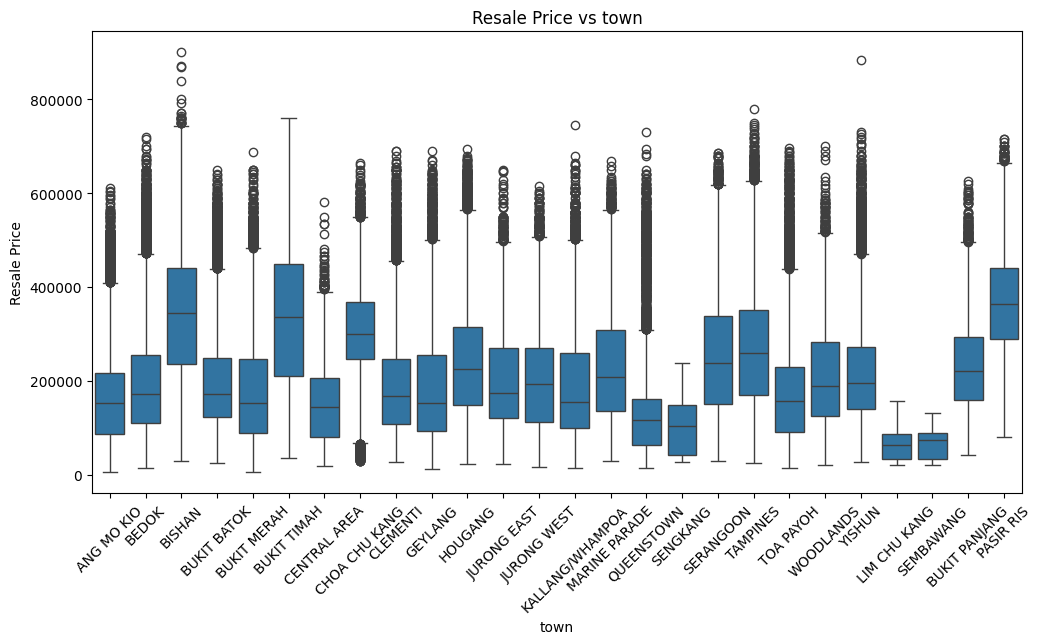

Column: flat_type | F-statistic: 78844.7647 | P-value: 0.0000


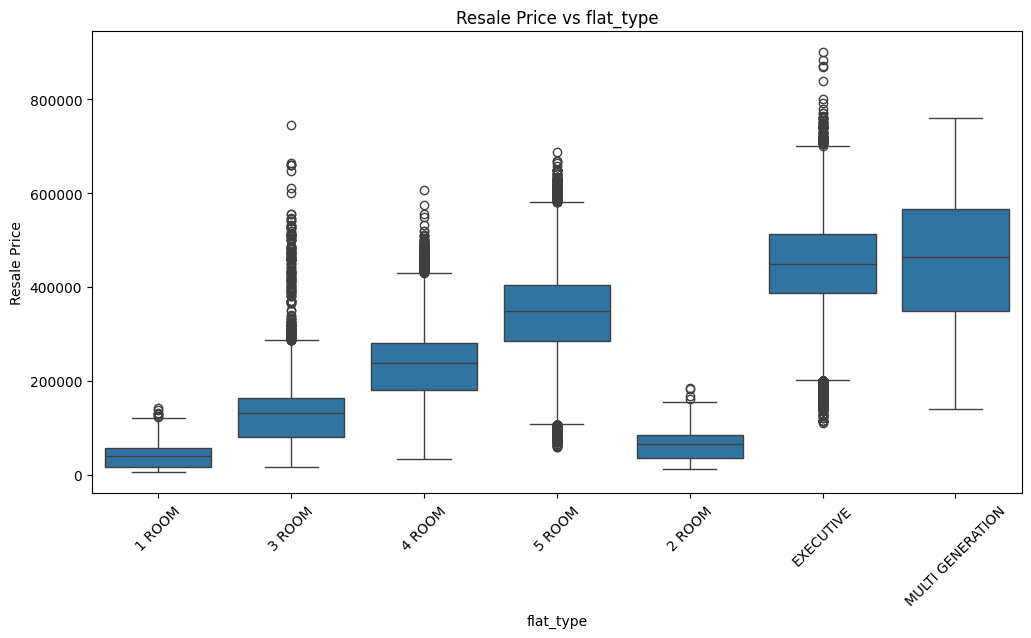

Column: flat_model | F-statistic: 11544.9472 | P-value: 0.0000


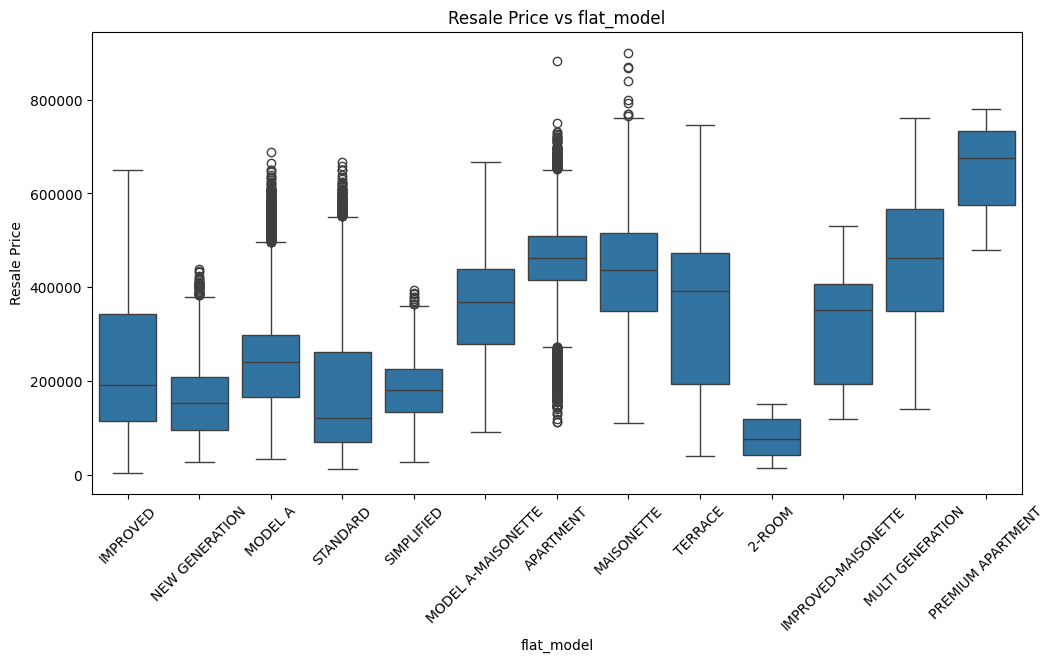

C:\Users\farvi\AppData\Local\Temp\ipykernel_9532\3438664271.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data.groupby(categorical_column)[target_column].apply(list)


Column: storey_category | F-statistic: 226.6381 | P-value: 0.0000


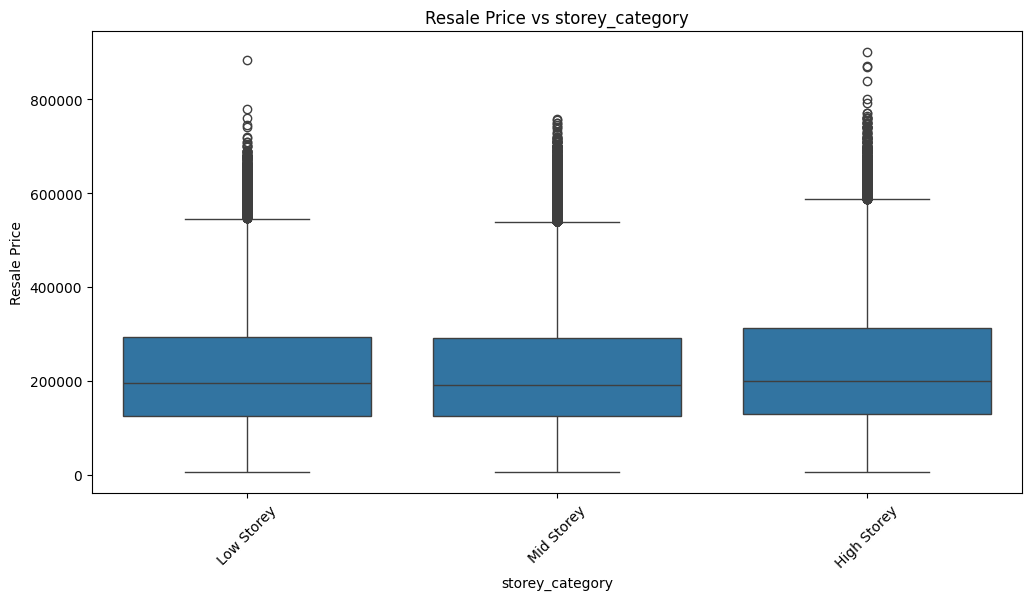

In [19]:
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Function to perform ANOVA and return F-statistic and p-value
def anova_test(data, categorical_column, target_column):
    groups = data.groupby(categorical_column)[target_column].apply(list)
    f_stat, p_value = f_oneway(*groups)
    return f_stat, p_value

# List of categorical columns to check
categorical_columns = ['town', 'flat_type', 'flat_model', 'storey_category']

# Loop through each categorical column and perform ANOVA
for column in categorical_columns:
    f_stat, p_value = anova_test(df, column, 'resale_price')
    print(f"Column: {column} | F-statistic: {f_stat:.4f} | P-value: {p_value:.4f}")
    
    # Visualize the relationship with a boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, y='resale_price', data=df)
    plt.title(f'Resale Price vs {column}')
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Resale Price')
    plt.show()


The analysis demonstrates that all categorical variables town, flat_type, flat_model, and storey_category are significantly correlated with **resale_price**. Each variable exhibits a very low p-value (<0.05), indicating strong statistical significance. This means these features play a crucial role in determining resale prices and should be retained in the model for predicting resale price accurately. However, for varibles such as town and flat_model there is relatively a lot of unique values respectively.

In [20]:
# Mapping towns to regions
region_map = {
    'ANG MO KIO': 'Central',
    'BEDOK': 'East',
    'BISHAN': 'Central',
    'BUKIT BATOK': 'West',
    'BUKIT MERAH': 'Central',
    'BUKIT TIMAH': 'Central',
    'CENTRAL AREA': 'Central',
    'CHOA CHU KANG': 'West',
    'CLEMENTI': 'West',
    'GEYLANG': 'East',
    'HOUGANG': 'North-East',
    'JURONG EAST': 'West',
    'JURONG WEST': 'West',
    'KALLANG/WHAMPOA': 'Central',
    'MARINE PARADE': 'East',
    'PASIR RIS': 'East',
    'PUNGGOL': 'North-East',
    'QUEENSTOWN': 'Central',
    'SEMBAWANG': 'North',
    'SENGKANG': 'North-East',
    'SERANGOON': 'North-East',
    'TAMPINES': 'East',
    'TOA PAYOH': 'Central',
    'WOODLANDS': 'North',
    'YISHUN': 'North'
}


# Mapping flat models to broader categories
flat_model_map = {
    'IMPROVED': 'Smaller Flats',
    'NEW GENERATION': 'Smaller Flats',
    'STANDARD': 'Smaller Flats',
    'MODEL A': 'Smaller Flats',
    'SIMPLIFIED': 'Smaller Flats',
    'MODEL A-MAISONETTE': 'Maisonettes',
    'MAISONETTE': 'Maisonettes',
    'IMPROVED-MAISONETTE': 'Maisonettes',
    'APARTMENT': 'Larger Flats',
    'TERRACE': 'Larger Flats',
    'PREMIUM APARTMENT': 'Larger Flats',
    '2-ROOM': 'Special Models',
    'MULTI GENERATION': 'Special Models'
}


# Adding the region column
df['region'] = df['town'].map(region_map)

# Add a new column for the broader categories
df['flat_model_category'] = df['flat_model'].map(flat_model_map)


del df ["town"]

del df ["flat_model"]


C:\Users\farvi\AppData\Local\Temp\ipykernel_9532\1363275802.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = df['town'].map(region_map)
C:\Users\farvi\AppData\Local\Temp\ipykernel_9532\1363275802.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flat_model_category'] = df['flat_model'].map(flat_model_map)


In [21]:
df

,flat_type,floor_area_sqm,resale_price,lease_age_years,storey_category,region,flat_model_category
0,1 ROOM,31.0,9000,13,High Storey,Central,Smaller Flats
1,1 ROOM,31.0,6000,13,Mid Storey,Central,Smaller Flats
2,1 ROOM,31.0,8000,13,High Storey,Central,Smaller Flats
3,1 ROOM,31.0,6000,13,Mid Storey,Central,Smaller Flats
4,3 ROOM,73.0,47200,14,Mid Storey,Central,Smaller Flats
...,...,...,...,...,...,...,...
287191,EXECUTIVE,142.0,456000,12,High Storey,North,Larger Flats
287192,EXECUTIVE,142.0,408000,11,Low Storey,North,Larger Flats
287193,EXECUTIVE,146.0,469000,11,Mid Storey,North,Maisonettes
287194,EXECUTIVE,146.0,440000,11,Mid Storey,North,Maisonettes


The dataset is simplified by mapping town into broader region categories (e.g., ANG MO KIO to Central, BEDOK to East) and flat_model into broader categories like Smaller Flats, Maisonettes, and Larger Flats. This reduces the number of unique values, making the data easier to analyze. The original town and flat_model columns are removed after creating the new region and flat_model_category columns.

Now OHE can be applied for the categorical data columns: town, flat_type, flat_model and storey_category

In [22]:
# Apply One-Hot Encoding to the specified categorical columns
df = pd.get_dummies(df, columns=['region', 'flat_type', 'flat_model_category', 'storey_category'])
# These columns are very important as they play an important role in determining the resale price
# Now df_encoded will have OHE applied to the specified columns


In [23]:
# Verifying all the columns
print("Total Columns:", len(df.columns))
print(df.columns.tolist())
df


Total Columns: 22
['floor_area_sqm', 'resale_price', 'lease_age_years', 'region_Central', 'region_East', 'region_North', 'region_North-East', 'region_West', 'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_type_MULTI GENERATION', 'flat_model_category_Larger Flats', 'flat_model_category_Maisonettes', 'flat_model_category_Smaller Flats', 'flat_model_category_Special Models', 'storey_category_Low Storey', 'storey_category_Mid Storey', 'storey_category_High Storey']


,floor_area_sqm,resale_price,lease_age_years,region_Central,region_East,region_North,region_North-East,region_West,flat_type_1 ROOM,flat_type_2 ROOM,...,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI GENERATION,flat_model_category_Larger Flats,flat_model_category_Maisonettes,flat_model_category_Smaller Flats,flat_model_category_Special Models,storey_category_Low Storey,storey_category_Mid Storey,storey_category_High Storey
0,31.0,9000,13,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,31.0,6000,13,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,31.0,8000,13,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,31.0,6000,13,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,73.0,47200,14,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287191,142.0,456000,12,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
287192,142.0,408000,11,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
287193,146.0,469000,11,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
287194,146.0,440000,11,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False


In [24]:
# Separate features (X) and target (y)
X = df.drop(columns=['resale_price'])  # Features
y = df['resale_price']  # Target

# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The evaluation metrics used to assess the models are:

1. **Mean Absolute Error (MAE):**  
   MAE measures the average magnitude of errors in predictions, giving an idea of how far the predicted values are from the actual values. It is useful for understanding the overall prediction accuracy in the same units as the target variable.

2. **Mean Squared Error (MSE):**  
   MSE gives the average squared difference between predicted and actual values, placing more emphasis on larger errors. This makes it helpful for identifying models that have significant prediction errors.

3. **R-squared (R²):**  
   R² indicates the proportion of variance in the target variable explained by the model. It is valuable for understanding how well the model fits the data, with higher values indicating better fit.

These metrics were chosen to provide a comprehensive evaluation of the models, balancing error magnitude (MAE), error sensitivity (MSE), and overall model fit (R²).


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred_train = model.predict(X_train)  # Predictions on training data
y_pred_test = model.predict(X_test)    # Predictions on test data

# Calculate MAE, MSE, and R² for both training and test sets
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics for training and testing sets
print("Linear Regression - Model Evaluation")

print(f"Training Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Training Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Training R-squared (R²): {r2_train:.4f}")

print(f"Testing Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Testing Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Testing R-squared (R²): {r2_test:.4f}")


Linear Regression - Model Evaluation
Training Mean Absolute Error (MAE): 55110.11
Training Mean Squared Error (MSE): 5396222370.80
Training R-squared (R²): 0.6710
Testing Mean Absolute Error (MAE): 55249.68
Testing Mean Squared Error (MSE): 5398918140.99
Testing R-squared (R²): 0.6726


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_train = tree_model.predict(X_train)  # Predictions on training data
y_pred_test = tree_model.predict(X_test)    # Predictions on test data

# Calculate MAE, MSE, and R² for both training and test sets
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics for training and testing sets
print("Decision Tree Regressor - Model Evaluation")

print(f"Training Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Training Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Training R-squared (R²): {r2_train:.4f}")

print(f"Testing Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Testing Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Testing R-squared (R²): {r2_test:.4f}")

Decision Tree Regressor - Model Evaluation
Training Mean Absolute Error (MAE): 44336.34
Training Mean Squared Error (MSE): 3782554851.94
Training R-squared (R²): 0.7694
Testing Mean Absolute Error (MAE): 44887.88
Testing Mean Squared Error (MSE): 3864792028.90
Testing R-squared (R²): 0.7656


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
# Predict on the training data
y_pred_train_rf = rf_model.predict(X_train)

# Predict on the test data
y_pred_test_rf = rf_model.predict(X_test)

# Calculate MAE, MSE, and R² for both training and test sets
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# Print the evaluation metrics for training and testing sets
print("Random Forest Regressor - Model Evaluation")

print(f"Training Mean Absolute Error (MAE): {mae_train_rf:.2f}")
print(f"Training Mean Squared Error (MSE): {mse_train_rf:.2f}")
print(f"Training R-squared (R²): {r2_train_rf:.4f}")

print(f"Testing Mean Absolute Error (MAE): {mae_test_rf:.2f}")
print(f"Testing Mean Squared Error (MSE): {mse_test_rf:.2f}")
print(f"Testing R-squared (R²): {r2_test_rf:.4f}")

Random Forest Regressor - Model Evaluation
Training Mean Absolute Error (MAE): 34910.80
Training Mean Squared Error (MSE): 2578584089.62
Training R-squared (R²): 0.8428
Testing Mean Absolute Error (MAE): 38290.46
Testing Mean Squared Error (MSE): 3114078041.84
Testing R-squared (R²): 0.8111


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
# Predict on the training data
y_pred_train_gb = gb_model.predict(X_train)

# Predict on the test data
y_pred_test_gb = gb_model.predict(X_test)

# Calculate MAE, MSE, and R² for both training and test sets
mae_train_gb = mean_absolute_error(y_train, y_pred_train_gb)
mae_test_gb = mean_absolute_error(y_test, y_pred_test_gb)

mse_train_gb = mean_squared_error(y_train, y_pred_train_gb)
mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)

r2_train_gb = r2_score(y_train, y_pred_train_gb)
r2_test_gb = r2_score(y_test, y_pred_test_gb)

# Print the evaluation metrics for training and testing sets
print("Gradient Boosting Regressor - Model Evaluation")

print(f"Training Mean Absolute Error (MAE): {mae_train_gb:.2f}")
print(f"Training Mean Squared Error (MSE): {mse_train_gb:.2f}")
print(f"Training R-squared (R²): {r2_train_gb:.4f}")

print(f"Testing Mean Absolute Error (MAE): {mae_test_gb:.2f}")
print(f"Testing Mean Squared Error (MSE): {mse_test_gb:.2f}")
print(f"Testing R-squared (R²): {r2_test_gb:.4f}")

Gradient Boosting Regressor - Model Evaluation
Training Mean Absolute Error (MAE): 49805.13
Training Mean Squared Error (MSE): 4484588691.39
Training R-squared (R²): 0.7266
Testing Mean Absolute Error (MAE): 50019.46
Testing Mean Squared Error (MSE): 4507030062.57
Testing R-squared (R²): 0.7267


Looking at the results, the Random Forest Regressor is the best choice because it has the lowest MAE(38290.46) , MSE(3114078041.84) and especially R-squared(0.8111) compared to the other models. It clearly performs better in predicting resale prices, making it the most reliable option for the project. This model will give me more accurate results for given data. Futhermore the model is a optimal fit as R-squared of training (0.8428) and testing(0.8111). The model can be improved further on.

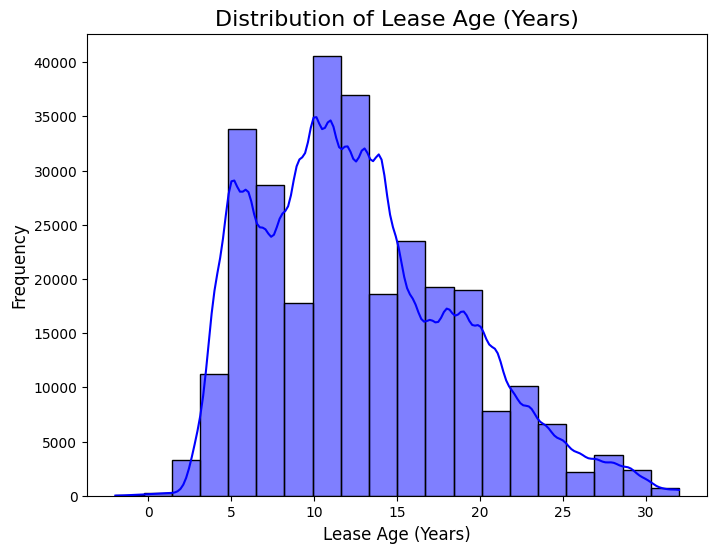

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['lease_age_years'], bins=20, kde=True, color='blue')
plt.title('Distribution of Lease Age (Years)', fontsize=16)
plt.xlabel('Lease Age (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


The histogram shows how lease ages are spread across the dataset. Most flats have leases aged between 5 to 15 years, and the number drops as the lease age increases. To make the user inputs more clearer and better, the lease age years could be changed to lease remaining by deducting lease age years from maximum 99 years of HDB lease. This can improve the model.

In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Feature Engineering: Add lease_remaining_percentage and round to nearest integer
df['lease_remaining'] = 100 - (df['lease_age_years'] / 99 * 100)
df['lease_remaining'] = df['lease_remaining'].round(0).astype(int)  # Round to nearest integer

# Remove the lease_age_years column after feature engineering
df = df.drop(columns=['lease_age_years'])

# Define features (X) and target (y)
X = df.drop(columns=['resale_price'])  # Drop the target column from features
y = df['resale_price']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display the evaluation metrics
print("Random Forest Regressor")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")


Random Forest Regressor
Mean Absolute Error (MAE): 38290.73
Mean Squared Error (MSE): 3113945648.85
R-squared (R²): 0.8112


In [31]:
df

,floor_area_sqm,resale_price,region_Central,region_East,region_North,region_North-East,region_West,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,...,flat_type_EXECUTIVE,flat_type_MULTI GENERATION,flat_model_category_Larger Flats,flat_model_category_Maisonettes,flat_model_category_Smaller Flats,flat_model_category_Special Models,storey_category_Low Storey,storey_category_Mid Storey,storey_category_High Storey,lease_remaining
0,31.0,9000,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,87
1,31.0,6000,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,87
2,31.0,8000,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,87
3,31.0,6000,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,87
4,73.0,47200,True,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287191,142.0,456000,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,88
287192,142.0,408000,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,89
287193,146.0,469000,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,89
287194,146.0,440000,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,89


Changing the lease age column to lease remaining resulted in a very marginal improvement in the model’s accuracy, with the R-squared value increasing slightly from 0.8111 to 0.8112. This negligible change indicates that the transformation had minimal impact on the model’s performance.

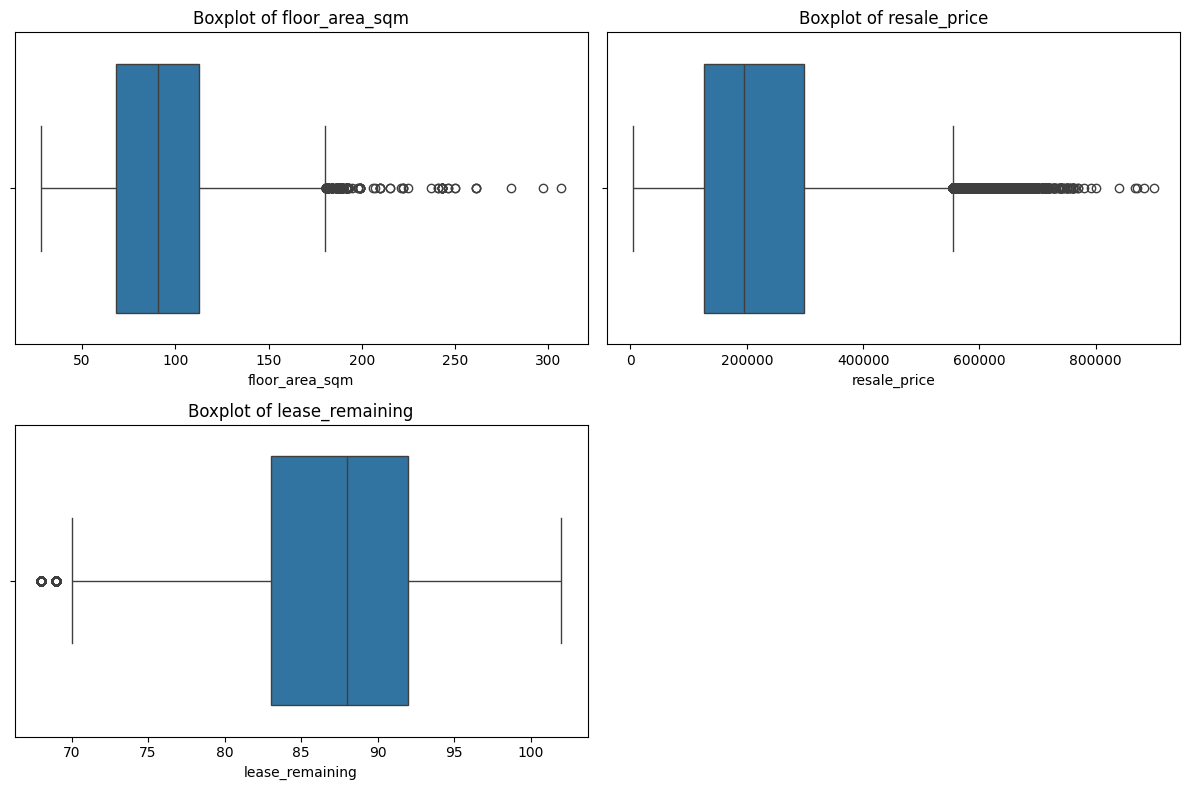

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features for which you want to visualize outliers
features = ['floor_area_sqm', 'resale_price', 'lease_remaining']  # Update as per your dataset

plt.figure(figsize=(12, 8))

# Create a box plot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each feature
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


The boxplots reveal several outliers, especially in the floor_area_sqm and resale_price with extreme high values that could impact model performance. To address this, the outliers has been capped by setting them to the nearest acceptable boundary, which helps reduce their influence while retaining the data's overall structure. This approach improves the model's accuracy by minimizing skewness caused by rare extreme values.

In [33]:
# Calculate the IQR for each feature
Q1 = df[['floor_area_sqm', 'resale_price', 'lease_remaining']].quantile(0.25)
Q3 = df[['floor_area_sqm', 'resale_price', 'lease_remaining']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers by setting values outside the bounds to the nearest bound
df[['floor_area_sqm', 'resale_price', 'lease_remaining']] = df[['floor_area_sqm', 'resale_price', 'lease_remaining']].apply(
    lambda x: x.clip(lower=lower_bound[x.name], upper=upper_bound[x.name])
)

# Display the cleaned dataset
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape (after capping outliers): {df.shape}")


Original data shape: (286370, 22)
Cleaned data shape (after capping outliers): (286370, 22)


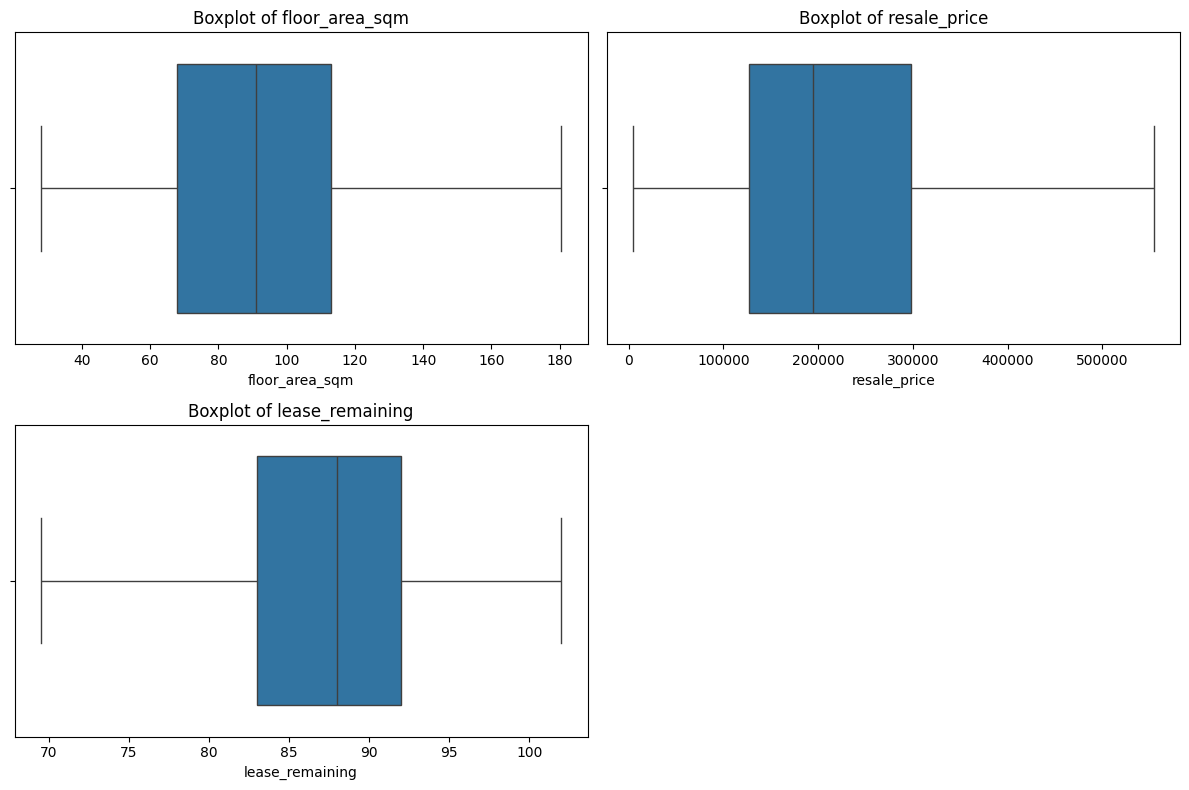

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features for which you want to visualize outliers
features = ['floor_area_sqm', 'resale_price', 'lease_remaining']  # Update as per your dataset

plt.figure(figsize=(12, 8))

# Create a box plot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each feature
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


Now there is no outliers visible for these features

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into features and target
X = df.drop('resale_price', axis=1)  # Features (remove 'resale_price' column)
y = df['resale_price']  # Target (resale price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor with customised complexity
rf_model = RandomForestRegressor(
    random_state=42,
    n_estimators=80,  # The number of trees
    max_depth=15     # The depth of the trees
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Regressor")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")

Random Forest Regressor
Mean Absolute Error (MAE): 38007.39
Mean Squared Error (MSE): 2955090316.14
R-squared (R²): 0.8148


After capping outliers and manually adjusting model parameters, the accuracy improved slightly, from R-squared of 0.8112 to 0.8148

In [36]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

# Define features (X) and target (y)
X = df.drop(columns=['resale_price'])  # Drop the target column from features
y = df['resale_price']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the reduced parameter grid for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300],  # Reduced the number of estimators
    'max_depth': [None, 20, 30],  # Reduced depth values
    'min_samples_split': [2, 5, 10],  # Reduced split options
    'min_samples_leaf': [1, 2, 5],  # Reduced leaf options
    'bootstrap': [True, False]  # Kept bootstrap options as is
}

# Initialize Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Reduced the number of iterations for quicker search
    scoring='neg_mean_squared_error',  # Use MSE as scoring metric
    cv=2,  # Reduced to 2-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Get the best model and parameters
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Display results
print("Best Random Forest Regressor")
print(f"Best Parameters: {best_params}")
print(f"Mean Absolute Error (MAE): {mae_best_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_best_rf:.2f}")
print(f"R-squared (R²): {r2_best_rf:.4f}")

# Save the best Random Forest model with GZIP compression at level 9
joblib.dump(best_rf_model, 'ResalePrice.pkl')
print("Model saved successfully as 'Resale_Price.pkl'")


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Random Forest Regressor
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 20, 'bootstrap': True}
Mean Absolute Error (MAE): 37821.72
Mean Squared Error (MSE): 2950565168.46
R-squared (R²): 0.8151
Model saved successfully as 'Resale_Price.pkl'


After performing RandomizedSearchCV and tuning the hyperparameters, the model's accuracy improved slightly from R-squared 0.8148 to  0.8151. However, the resulting saved model file, remains too large at way over 25 MB, making it unsuitable for upload to a GitHub repository for deployment. This file size limitation needs to be addressed to ensure that the model is both accurate and deployable. Further optimization or alternative approaches may be necessary to reduce the file size while maintaining performance.

In [37]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Define the best parameters you found
best_params = {
    'n_estimators': 80,
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'max_depth': 16,  
    'bootstrap': True
}

# Initialize Random Forest Regressor with best parameters
rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_depth=best_params['max_depth'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Save the model
joblib.dump(rf_model, 'ResalePrice_Final.pkl', compress=('gzip', 9))
print("Model saved successfully as 'Resale_Price_Final.pkl' with GZIP compression")


Mean Absolute Error (MAE): 37974.31
Mean Squared Error (MSE): 2948424955.89
R-squared (R²): 0.8152
Model saved successfully as 'Resale_Price_Final.pkl' with GZIP compression


After fine-tuning the parameters suggested by RandomizedSearchCV, the model’s accuracy again showed a minor improvement , from 0.8151 to 0.8152, which is still very satisfactory. At the same time, the file size was successfully reduced to below 25 MB through compression, which is ideal for uploading file into github for deployment in streamlit cloud. This optimization successfully strikes a balance between accuracy and model file size.

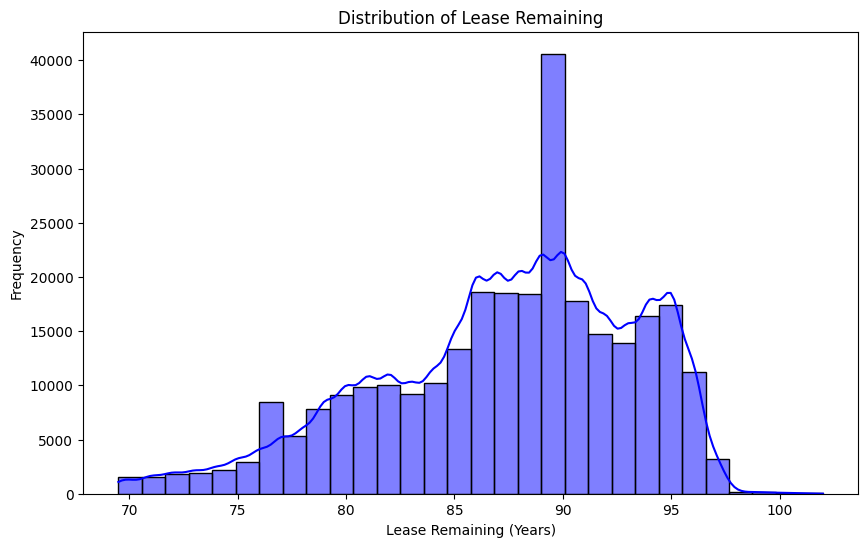

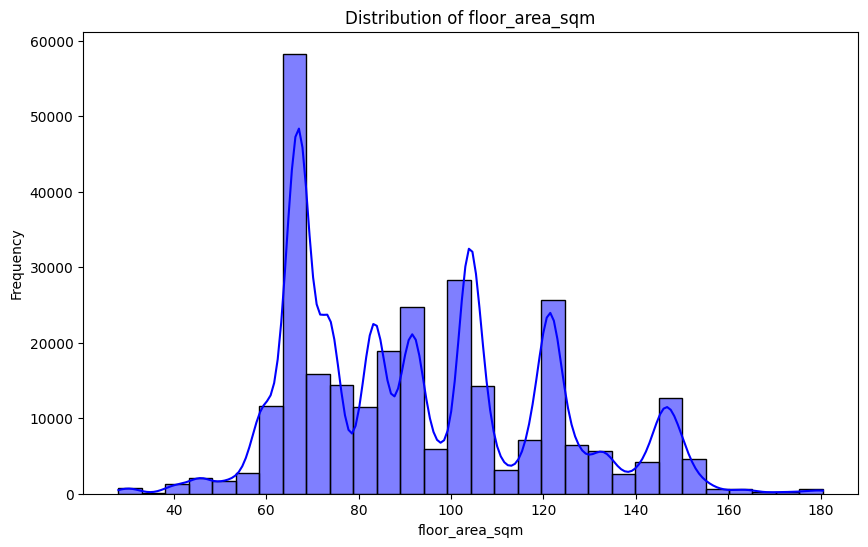

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['lease_remaining'], kde=True, bins=30, color='blue')
plt.title("Distribution of Lease Remaining")
plt.xlabel("Lease Remaining (Years)")
plt.ylabel("Frequency")
plt.show()


# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['floor_area_sqm'], kde=True, bins=30, color='blue')
plt.title("Distribution of floor_area_sqm")
plt.xlabel("floor_area_sqm")
plt.ylabel("Frequency")
plt.show()


These distribution plots are useful for determining the minimum and maximum user input values in the deployed app, ensuring the input ranges are appropriate and aligned with the data distribution.

In [39]:
df.shape

(286370, 22)

                               Feature  Importance
0                       floor_area_sqm    0.749932
20                     lease_remaining    0.099425
9                     flat_type_4 ROOM    0.065825
11                 flat_type_EXECUTIVE    0.021694
1                       region_Central    0.016905
5                          region_West    0.008383
2                          region_East    0.007751
3                         region_North    0.007373
4                    region_North-East    0.005130
19         storey_category_High Storey    0.003681
13    flat_model_category_Larger Flats    0.003640
17          storey_category_Low Storey    0.002815
18          storey_category_Mid Storey    0.002219
14     flat_model_category_Maisonettes    0.002035
10                    flat_type_5 ROOM    0.001448
8                     flat_type_3 ROOM    0.000912
15   flat_model_category_Smaller Flats    0.000415
12          flat_type_MULTI GENERATION    0.000201
16  flat_model_category_Special

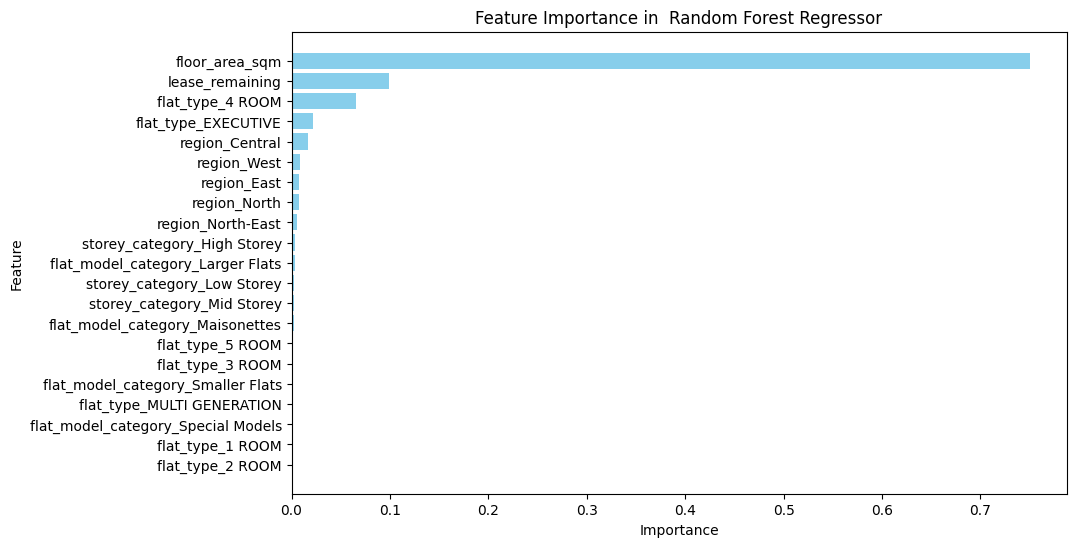

In [40]:
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_names = X.columns  # Extract feature names from X
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(importance_df)

# (Optional) Visualize feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in  Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()